In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
sns.set_context("notebook")
sns.set_theme()
sns.set_palette("Set3")
sns.set(font_scale=1.3)

In [3]:
maciek = pd.read_csv('./../data/running_data.csv')
world = pd.read_csv('./../data/world_records.csv')

In [4]:
maciek = maciek.loc[maciek['Type'] == 'Records']
maciek = maciek[['Moving Time', 'Distance']]
maciek['Distance'] = maciek['Distance']*1000

In [5]:
world = world.loc[(maciek['Distance'].min() <= world['Distance']) & (world['Distance'] <= maciek['Distance'].max())]

------
## Porównanie rekordów

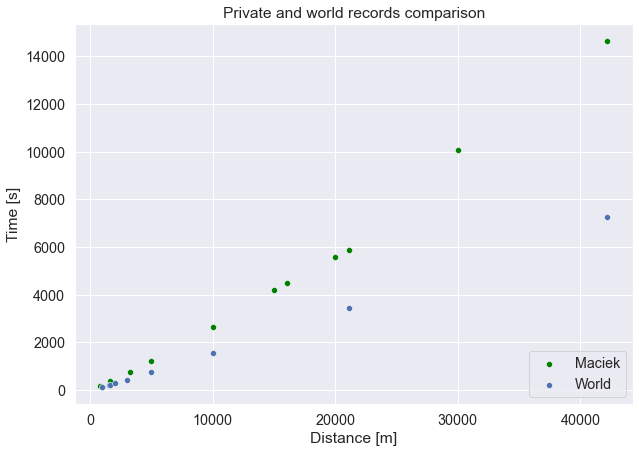

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=maciek, x='Distance', y='Moving Time', color='green', label='Maciek')
sns.scatterplot(data=world, x='Distance', y='Time', color='C0', label='World')
ax.set_ylabel('Time [s]')
ax.set_xlabel('Distance [m]')
ax.set_title('Private and world records comparison')
ax.legend(loc=4)
plt.show()

-----
## Tempo

In [6]:
maciek['pace'] = maciek['Moving Time']/maciek['Distance']
world['pace'] = world['Time']/world['Distance']

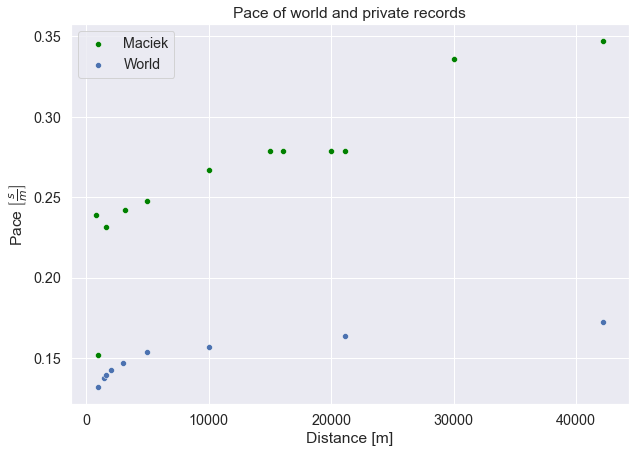

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.set_ylabel(r'Pace $\left[\frac{s}{m}\right]$')
ax.set_xlabel('Distance [m]')
ax.set_title('Pace of world and private records')
sns.scatterplot(data=maciek, x='Distance', y='pace', color='green', label='Maciek')
sns.scatterplot(data=world, x='Distance', y='pace', color='C0', label='World')
ax.legend(loc=2)
#plt.savefig('./../images/pace_maciek_world.jpg', dpi=300)

------
## Stosunek

In [23]:
maciek_world = pd.merge(maciek, world, on='Distance')

In [24]:
maciek_world['ratio'] = maciek_world['Time']/maciek_world['Moving Time']
maciek_world

,Moving Time,Distance,pace_x,Time,pace_y,ratio
0,152.0,1000.0,0.152000,131.96,0.131960,0.868158
1,1239.0,5000.0,0.247800,769.00,0.153800,0.620662
2,2668.0,10000.0,0.266800,1571.00,0.157100,0.588831
3,5885.0,21097.5,0.278943,3451.00,0.163574,0.586406
4,14641.0,42195.0,0.346984,7269.00,0.172272,0.496482


Text(0.5, 1.0, 'Ratio of world and private records')

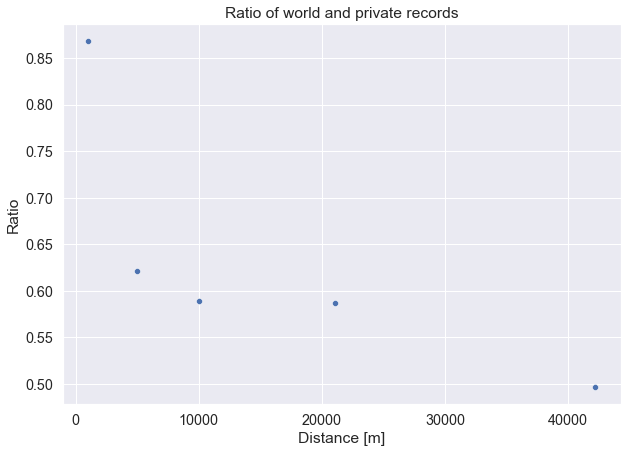

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.scatterplot(data=maciek_world, x='Distance', y='ratio', color='C0')
ax.set_ylabel('Ratio')
ax.set_xlabel('Distance [m]')
ax.set_title('Ratio of world and private records')
#plt.savefig("images/ratio_maciek_world.jpg", dpi=300)